In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import ast

In [18]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [2]:
df = pd.read_csv("data/area_cleaned/merged-area-clean-v1.csv")
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,...,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,...,3,40.0,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


3.0796654121147893


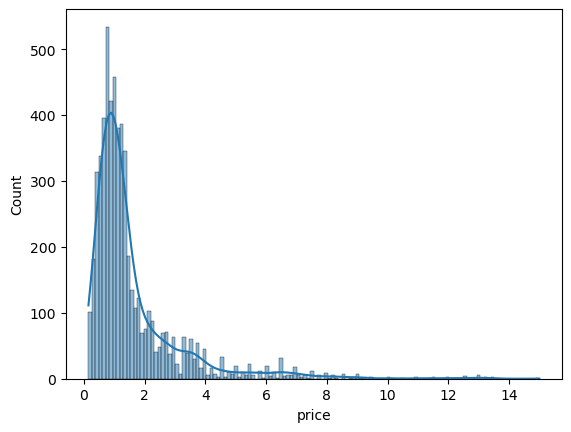

In [3]:
print(df[df['City'] == 'Mohali']['price'].skew())
sns.histplot(x = df[df['City'] == 'Mohali']['price'],kde = True)
plt.show()

2.6086392383222328


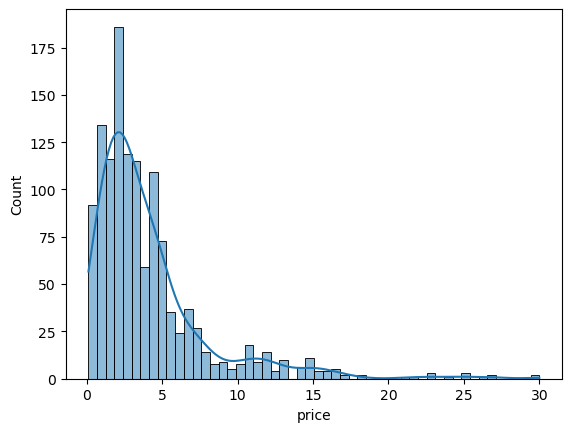

In [4]:
print(df[df['City'] == 'Panchkula']['price'].skew())
sns.histplot(x = df[df['City'] == 'Panchkula']['price'],kde = True)
plt.show()

3.381843393539527


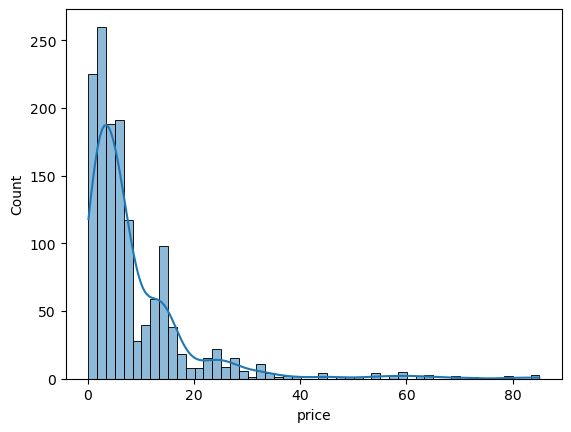

In [5]:
print(df[df['City'] == 'Chandigarh']['price'].skew())
sns.histplot(x = df[df['City'] == 'Chandigarh']['price'],kde = True)
plt.show()

0.4202828049817376


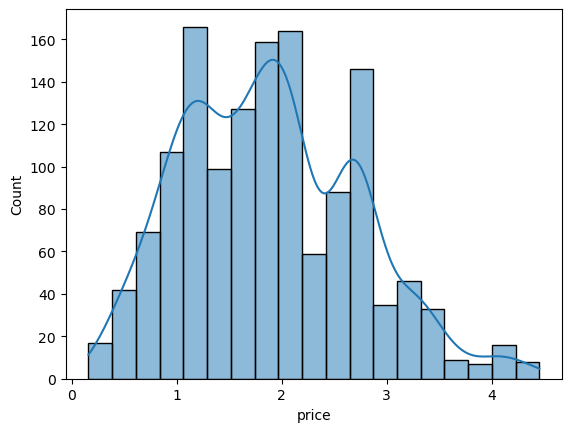

In [6]:
print(np.log1p(df[df['City'] == 'Chandigarh']['price']).skew())
sns.histplot(x = np.log1p(df[df['City'] == 'Chandigarh']['price']),kde = True)
plt.show()

### Additional Room

In [7]:
df['additionalRoom'].value_counts()

additionalRoom
Pooja Room                                              886
Servant Room                                            734
Store Room                                              622
Others                                                  593
Pooja Room,Study Room,Servant Room,Store Room           252
                                                       ... 
Pooja Room,Servant Room,Study Room,Store Room,Others      1
Study Room,Others,Servant Room,Pooja Room                 1
Servant Room,Store Room,Study Room                        1
Others,Pooja Room,Servant Room,Store Room                 1
Servant Room,Pooja Room,Others                            1
Name: count, Length: 103, dtype: int64

In [8]:
def addroom_func(x):
    if pd.notna(x):
        temp = sorted(x.split(','))
        return ','.join(temp)
    return x

In [9]:
df['additionalRoom'] = df['additionalRoom'].apply(addroom_func)

In [10]:
df['additionalRoom'].value_counts()

additionalRoom
Pooja Room                                              886
Servant Room                                            734
Store Room                                              622
Pooja Room,Servant Room,Store Room,Study Room           619
Others                                                  593
Others,Pooja Room,Servant Room,Study Room               270
Study Room                                              218
Pooja Room,Store Room                                   208
Pooja Room,Store Room,Study Room                        198
Pooja Room,Servant Room                                 189
Pooja Room,Study Room                                   134
Pooja Room,Servant Room,Study Room                      127
Others,Pooja Room                                       109
Servant Room,Store Room                                  99
Others,Pooja Room,Study Room                             77
Pooja Room,Servant Room,Store Room                       71
Others,Pooja Room,Servant

In [11]:
temp = 'Others,Pooja Room,Servant Room,Store Room,Study Room'

In [12]:
temp.split(',')

['Others', 'Pooja Room', 'Servant Room', 'Store Room', 'Study Room']

In [13]:
def addroom_split_func(x):
    pooja_room = 0
    servant_room = 0
    store_room = 0
    study_room = 0
    others = 0
    if pd.notna(x):
        temp = x.split(',')
        for i in temp:
            if i == 'Pooja Room':
                pooja_room = 1
            elif i == 'Servant Room':
                servant_room = 1
            elif i == 'Store Room':
                store_room = 1
            elif i == 'Study Room':
                study_room = 1
            elif i == 'Others':
                others = 1
    return pooja_room,servant_room,store_room,study_room,others

In [14]:
add_room_df = df['additionalRoom'].apply(addroom_split_func)

In [15]:
room_df = df['additionalRoom'].apply(addroom_split_func).apply(pd.Series)
room_df.columns = ['Pooja Room','Servant Room','Store Room','Study Room','Other Room']

In [16]:
# 20
df.insert(20,'Other Room',value= room_df['Other Room'].values)
df.insert(20,'Study Room',value= room_df['Study Room'].values)
df.insert(20,'Store Room',value= room_df['Store Room'].values)
df.insert(20,'Servant Room',value= room_df['Servant Room'].values)
df.insert(20,'Pooja Room',value= room_df['Pooja Room'].values)

In [19]:
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.0,sq.yards,7,7,4,Servant Room,0,1,0,0,0,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


### Furnishing

In [21]:
df[['Furnishing','furnishDetails']]

,Furnishing,furnishDetails
0,Semifurnished,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch..."
1,Unfurnished,NaN
2,NaN,[]
3,Semifurnished,"['16 Light', '1 Modular Kitchen', '1 Chimney',..."
4,Furnished,"['9 Wardrobe', '12 Fan', '16 Light', '1 Modula..."
...,...,...
8432,Unfurnished,NaN
8433,Semifurnished,"['1 Geyser', '1 Modular Kitchen', 'No AC', 'No..."
8434,Furnished,"['3 Bed', '3 Wardrobe', '1 Water Purifier', '3..."
8435,Semifurnished,"['3 Fan', '2 Geyser', '6 Light', '1 Chimney', ..."


In [22]:
df['link'].loc[4677]

'https://www.99acres.com/3-bhk-bedroom-apartment-flat-for-sale-in-maxxus-elanza-zirakpur-chandigarh-1555-sq-ft-spid-X74574947'

In [23]:
df['Furnishing'].value_counts()

Furnishing
Semifurnished    5094
Unfurnished      2052
Furnished         680
Name: count, dtype: int64

In [24]:
df['Furnishing'].isna().sum()

611

In [25]:
#df[df['Furnishing'].isna()][['Furnishing','furnishDetails']]

In [26]:
df['Furnishing'].fillna('Unfurnished',inplace = True)

In [27]:
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.0,sq.yards,7,7,4,Servant Room,0,1,0,0,0,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


### Water Source

In [28]:
df['WaterSource'].value_counts()

WaterSource
24*7 Water                                        1530
24*7 Water,Borewell/Tank,Municipal corporation    1444
Municipal corporation                             1383
24*7 Water,Municipal corporation                  1238
24*7 Water,Borewell/Tank                           815
Borewell/Tank                                      189
Borewell/Tank,Municipal corporation                188
Name: count, dtype: int64

In [29]:
def water_func(x):
    water_24_7 = 0
    mc_water = 0
    bwell_tank = 0
    if pd.notna(x):
        temp = x.split(',')
        for i in temp:
            if i == '24*7 Water':
                water_24_7 = 1
            elif i == 'Municipal corporation':
                mc_water = 1
            elif i == 'Borewell/Tank':
                bwell_tank = 1
    return water_24_7,mc_water,bwell_tank

In [30]:
water_df = df['WaterSource'].apply(water_func).apply(pd.Series)
water_df.columns = ['24*7 Water','MuniCorp Water','Borewell/Tank']

In [31]:
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.0,sq.yards,7,7,4,Servant Room,0,1,0,0,0,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


In [32]:
# 37
df.insert(37,'Borewell/Tank',value= water_df['Borewell/Tank'].values)
df.insert(37,'MuniCorp Water',value= water_df['MuniCorp Water'].values)
df.insert(37,'24*7 Water',value= water_df['24*7 Water'].values)

In [33]:
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.0,sq.yards,7,7,4,Servant Room,0,1,0,0,0,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",1,1,0,NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


### Overlooking

In [39]:
df['Overlooking'].value_counts()

Overlooking
Club,Main Road,Others,Park/Garden,Pool               898
Others                                               859
Park/Garden                                          856
Club,Main Road,Park/Garden,Pool                      649
Main Road                                            624
Main Road,Park/Garden                                593
Club,Main Road,Park/Garden                           377
Main Road,Others,Park/Garden                         280
Main Road,Others                                     244
Club,Park/Garden,Pool                                164
Others,Park/Garden                                   151
Club,Park/Garden                                      76
Club,Main Road,Others,Park/Garden,Pool,Sea facing     73
Club,Main Road,Others,Park/Garden                     72
Main Road,Park/Garden,Pool                            52
Club,Others,Park/Garden,Pool                          40
Park/Garden,Pool                                      38
Pool               

In [40]:
def overlooking_func(x):
    main_road = 0
    park_garden = 0
    pool = 0
    club = 0
    others = 0
    if pd.notna(x):
        temp = x.split(',')
        for i in temp:
            if i == 'Main Road':
                main_road = 1
            elif i == 'Park/Garden':
                park_garden = 1
            elif i == 'Pool':
                pool = 1
            elif i == 'Club':
                club = 1
            elif i == 'Others':
                others = 1
            else:
                others = 1
    return main_road,park_garden,pool,club,others

In [41]:
df['Overlooking'].apply(overlooking_func)

0       (0, 0, 0, 0, 1)
1       (1, 0, 0, 0, 0)
2       (0, 0, 0, 0, 0)
3       (0, 1, 0, 0, 0)
4       (1, 1, 0, 0, 0)
             ...       
8432    (1, 1, 0, 1, 0)
8433    (0, 0, 0, 0, 0)
8434    (1, 1, 0, 0, 0)
8435    (1, 1, 0, 0, 0)
8436    (0, 0, 0, 0, 0)
Name: Overlooking, Length: 8437, dtype: object

In [43]:
overlooking_df = df['Overlooking'].apply(overlooking_func).apply(pd.Series)
overlooking_df.columns = ['Main Road','Park/Garden','Pool','Club','Others']

In [46]:
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.0,sq.yards,7,7,4,Servant Room,0,1,0,0,0,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",1,1,0,NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


In [47]:
df.insert(29,'Overlook Others',value= overlooking_df['Others'].values)
df.insert(29,'Club',value= overlooking_df['Club'].values)
df.insert(29,'Pool',value= overlooking_df['Pool'].values)
df.insert(29,'Park/Garden',value= overlooking_df['Park/Garden'].values)
df.insert(29,'Main Road',value= overlooking_df['Main Road'].values)

In [48]:
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.0,sq.yards,7,7,4,Servant Room,0,1,0,0,0,North-West,0,2,Others,0,0,0,0,1,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",1,1,0,NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


### Features

In [54]:
df['features'].loc[1]

"['False Ceiling Lighting', 'Separate entry for servant room', 'Visitor Parking', 'Security Personnel']"

In [55]:
temp = "['False Ceiling Lighting', 'Separate entry for servant room', 'Visitor Parking', 'Security Personnel']"

In [63]:
df['features'].fillna('[]',inplace = True)

In [80]:
all_features = df['features'].apply(ast.literal_eval)

In [66]:
from collections import Counter

In [82]:
all_factilites = [feature for sublist in all_features for feature in sublist]

In [85]:
feat_count = Counter(all_factilites)

In [93]:
feat_df = pd.DataFrame(feat_count.items(), columns=['Facility', 'Count'])
feat_df

,Facility,Count
0,Feng Shui / Vaastu Compliant,3566
1,Water purifier,1004
2,Maintenance Staff,4349
3,Water Storage,5234
4,Separate entry for servant room,1236
5,No open drainage around,2341
6,Visitor Parking,5118
7,Natural Light,2649
8,Airy Rooms,2648
9,Spacious Interiors,1707


In [100]:
feat_list = list(feat_df['Facility'].values)

In [102]:
len(feat_list)

32

In [103]:
np.zeros(32)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [136]:
def feat_func(x):
    cols = feat_list
    final_arr = np.zeros(32,dtype = int)
    if pd.notna(x):
        temp =  ast.literal_eval(x)
        for i in temp:
            if i in cols:
                col_loc = cols.index(i)
                final_arr[col_loc] = 1
    return tuple(final_arr)

In [137]:
df['features'].apply(feat_func)

0       (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...
1       (0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...
2       (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       (0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...
4       (1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, ...
                              ...                        
8432    (0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...
8433    (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8434    (0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...
8435    (0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
8436    (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: features, Length: 8437, dtype: object

In [138]:
feat_df = df['features'].apply(feat_func).apply(pd.Series)
feat_df.columns = feat_list

In [139]:
feat_df

,Feng Shui / Vaastu Compliant,Water purifier,Maintenance Staff,Water Storage,Separate entry for servant room,No open drainage around,Visitor Parking,Natural Light,Airy Rooms,Spacious Interiors,Low Density Society,Waste Disposal,False Ceiling Lighting,Security Personnel,Park,High Ceiling Height,Recently Renovated,Bank Attached Property,Rain Water Harvesting,Private Garden / Terrace,Internet/wi-fi connectivity,Centrally Air Conditioned,Piped-gas,Fitness Centre / GYM,Club house / Community Center,Swimming Pool,Security / Fire Alarm,Intercom Facility,Lift(s),Shopping Centre,Power Back-up,Water softening plant
0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,1,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8432,0,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0
8433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
8434,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8435,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [140]:
from sklearn.cluster import KMeans

In [141]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(feat_df)
    wcss_reduced.append(kmeans.inertia_)

D:\DS_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\DS_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\DS_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\DS_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

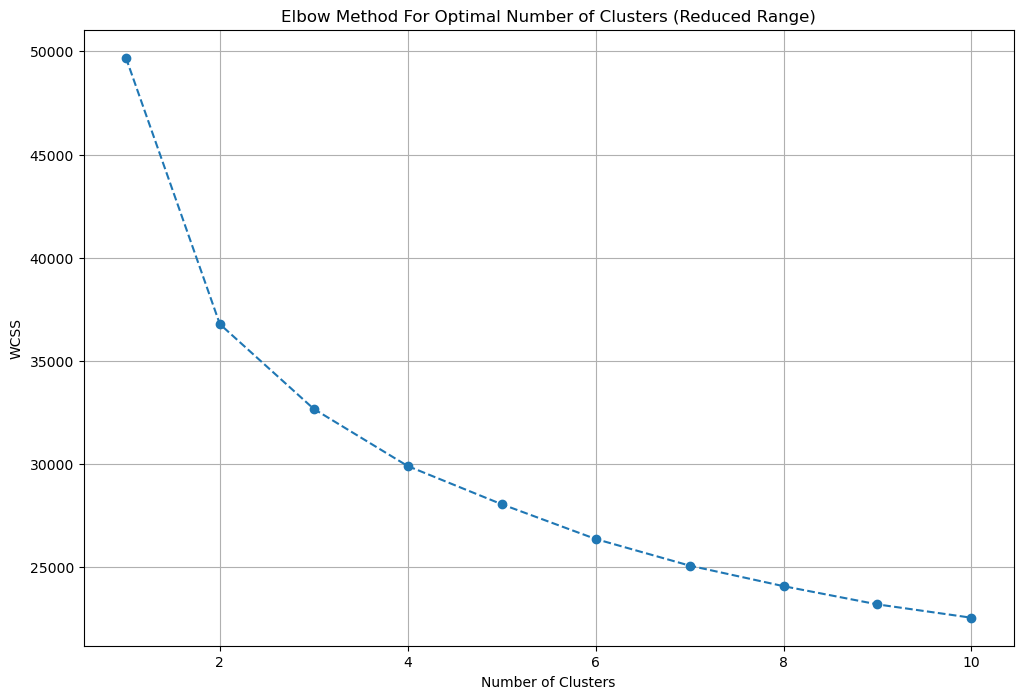

In [142]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [143]:
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(feat_df)
    silhouette_avg = silhouette_score(feat_df, cluster_labels)
    sil.append(silhouette_avg)

D:\DS_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\DS_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\DS_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\DS_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

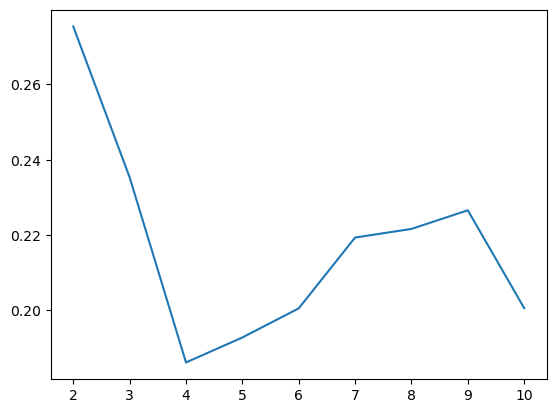

In [144]:
plt.plot(range(2,11),sil)

In [145]:
kmeans = KMeans(n_clusters=2, random_state=42)
preds = kmeans.fit_predict(feat_df)

D:\DS_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [146]:
feat_df['labels'] = preds

In [147]:
feat_df

,Feng Shui / Vaastu Compliant,Water purifier,Maintenance Staff,Water Storage,Separate entry for servant room,No open drainage around,Visitor Parking,Natural Light,Airy Rooms,Spacious Interiors,Low Density Society,Waste Disposal,False Ceiling Lighting,Security Personnel,Park,High Ceiling Height,Recently Renovated,Bank Attached Property,Rain Water Harvesting,Private Garden / Terrace,Internet/wi-fi connectivity,Centrally Air Conditioned,Piped-gas,Fitness Centre / GYM,Club house / Community Center,Swimming Pool,Security / Fire Alarm,Intercom Facility,Lift(s),Shopping Centre,Power Back-up,Water softening plant,labels
0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,0,0,1,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8432,0,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0
8433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
8434,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8435,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


In [157]:
feat_df[feat_df['labels'] == 1].sample(5)

,Feng Shui / Vaastu Compliant,Water purifier,Maintenance Staff,Water Storage,Separate entry for servant room,No open drainage around,Visitor Parking,Natural Light,Airy Rooms,Spacious Interiors,Low Density Society,Waste Disposal,False Ceiling Lighting,Security Personnel,Park,High Ceiling Height,Recently Renovated,Bank Attached Property,Rain Water Harvesting,Private Garden / Terrace,Internet/wi-fi connectivity,Centrally Air Conditioned,Piped-gas,Fitness Centre / GYM,Club house / Community Center,Swimming Pool,Security / Fire Alarm,Intercom Facility,Lift(s),Shopping Centre,Power Back-up,Water softening plant,labels
1603,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4999,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
1183,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
6983,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
977,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [158]:
feat_list

['Feng Shui / Vaastu Compliant',
 'Water purifier',
 'Maintenance Staff',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Visitor Parking',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'False Ceiling Lighting',
 'Security Personnel',
 'Park',
 'High Ceiling Height',
 'Recently Renovated',
 'Bank Attached Property',
 'Rain Water Harvesting',
 'Private Garden / Terrace',
 'Internet/wi-fi connectivity',
 'Centrally Air Conditioned',
 'Piped-gas',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Swimming Pool',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Shopping Centre',
 'Power Back-up',
 'Water softening plant']

In [181]:
facility_scores = {
    'Basic': ['Water purifier', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Natural Light', 'Maintenance Staff', 'No open drainage around'],
    'Standard': ['Feng Shui / Vaastu Compliant','Lift(s)','Airy Rooms', 'Spacious Interiors', 'False Ceiling Lighting', 'Security Personnel', 'Park', 'High Ceiling Height', 'Recently Renovated'],
    'Premium': ['Bank Attached Property', 'Rain Water Harvesting', 'Internet/wi-fi connectivity','Low Density Society','Centrally Air Conditioned', 'Piped-gas','Separate entry for servant room','Fitness Centre / GYM', 'Club house / Community Center','Power Back-up'],
    'Luxury': ['Swimming Pool', 'Security / Fire Alarm', 'Intercom Facility', 'Shopping Centre', 'Water softening plant', 'Private Garden / Terrace']
}

In [182]:
facility_score_map = {}
for score, facilities in facility_scores.items():
    for facility in facilities:
        facility_score_map[facility] = score

In [183]:
facility_score_map

{'Water purifier': 'Basic',
 'Water Storage': 'Basic',
 'Visitor Parking': 'Basic',
 'Waste Disposal': 'Basic',
 'Natural Light': 'Basic',
 'Maintenance Staff': 'Basic',
 'No open drainage around': 'Basic',
 'Feng Shui / Vaastu Compliant': 'Standard',
 'Lift(s)': 'Standard',
 'Airy Rooms': 'Standard',
 'Spacious Interiors': 'Standard',
 'False Ceiling Lighting': 'Standard',
 'Security Personnel': 'Standard',
 'Park': 'Standard',
 'High Ceiling Height': 'Standard',
 'Recently Renovated': 'Standard',
 'Bank Attached Property': 'Premium',
 'Rain Water Harvesting': 'Premium',
 'Internet/wi-fi connectivity': 'Premium',
 'Low Density Society': 'Premium',
 'Centrally Air Conditioned': 'Premium',
 'Piped-gas': 'Premium',
 'Separate entry for servant room': 'Premium',
 'Fitness Centre / GYM': 'Premium',
 'Club house / Community Center': 'Premium',
 'Power Back-up': 'Premium',
 'Swimming Pool': 'Luxury',
 'Security / Fire Alarm': 'Luxury',
 'Intercom Facility': 'Luxury',
 'Shopping Centre': 'Lux

In [184]:
facility_score_map['Water purifier']

'Basic'

In [185]:
def feat_score_func(x):
    cols = feat_list
    score = 0
    if pd.notna(x):
        temp =  ast.literal_eval(x)
        for i in temp:
            if i in cols:
                if facility_score_map[i] == 'Basic':
                    score += 1
                elif facility_score_map[i] == 'Standard':
                    score += 2
                elif facility_score_map[i] == 'Premium':
                    score += 3
                elif facility_score_map[i] == 'Luxury':
                    score += 5
    return score

In [188]:
pd.options.display.max_rows = None

In [201]:
lux_score = df['features'].apply(feat_score_func)

In [202]:
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.0,sq.yards,7,7,4,Servant Room,0,1,0,0,0,North-West,0,2,Others,0,0,0,0,1,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",1,1,0,NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


In [207]:
df.drop(columns = 'Facility_Category',inplace = True)

In [208]:
df.insert(50,'Luxury Score',value=lux_score)

In [209]:
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,Luxury Score,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.0,sq.yards,7,7,4,Servant Room,0,1,0,0,0,North-West,0,2,Others,0,0,0,0,1,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",1,1,0,NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...",19,"['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


In [211]:
df['Luxury Score'].value_counts().sort_index()

Luxury Score
0     920
1     316
2     154
3     212
4     160
5     233
6     185
7     252
8     212
9     127
10    227
11    128
12    215
13    154
14    150
15    157
16    202
17    143
18    166
19    360
20     81
21     85
22     61
23    118
24     80
25    126
26    193
27     62
28     95
29     86
30    119
31    111
32     66
33    104
34     90
35     55
36    100
37     61
38     65
39     77
40     58
41     64
42     84
43     93
44     67
45     55
46     94
47     50
48     52
49     54
50     58
51     50
52     31
53     60
54     38
55     82
56     50
57     29
58    160
59     52
60     24
61    145
62     54
63     32
64     36
65     31
66     18
67     18
68     20
69     22
70     32
71     12
72     13
73     11
74     20
75     19
76     12
77     18
78     13
79     15
80     15
81      1
82     32
83      2
84      1
85     32
Name: count, dtype: int64

- 0-10 = Basic
- 11 - 30 =  Standard
- 30 - 60 = Premium
- 61+ = Luxurious 

In [227]:
def feat_cat(value):
    if 0 <= value <= 10:
        return 'Basic'
    elif 11 <= value <= 30:
        return 'Standard'
    elif 31 <= value <= 60:
        return 'Premium'
    else:
        return 'Luxurious'

In [228]:
feat_cats = df['Luxury Score'].apply(feat_cat)

In [231]:
df.insert(51,'Facilities Categories',value=feat_cats)

In [233]:
df.to_csv("data/feat_eng/feat-eng-df-v1.csv",index = False)